In [24]:
#Cargar paquetes
import pandas as pd
import sqlite3 as sql
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pyplot import figure
from matplotlib import colorbar
from matplotlib import pyplot
import sqlite3 as sql 
#Conexion con base sql
conn= sql.connect("db_empleados.db")

#cargar bases e datos
#df_completa=pd.read_csv("https://raw.githubusercontent.com/vladimir-martin/analitica3_HR/main/df_completa.csv")
#traigo base de datos pre-procesada de sql
df_completa=pd.read_sql("select * from base_full  ",conn)
print("****Numero de registros de la tabla*** \n  ", pd.read_sql("select count(distinct EmployeeID)  from base_full  ",conn))
print(df_completa.info())


****Numero de registros de la tabla*** 
      count(distinct EmployeeID)
0                        4410
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   float64
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   float64
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   float64
 12  NumCompaniesWorked       4410

Se realiza un analisis exploratorio de variables relevantes relacionadas con el objeto de la solucion, la variable respuesta de retiros y lo que influye en ella.

In [3]:
#analisis del mes de retiro
pd.read_sql("""select strftime('%m',retirementDate) as Mes, 
                                count(*) as Retiros
                                from retirement 
                                group by Mes
                                order by Retiros DESC""", conn)
#El mes con mayor numero de retiros es Julio, seguido por enero, en general la tasa de retiros es similar durante dolo el año, menos en diciembre que cae considerablemente.

,Mes,Retiros
0,07,77
1,01,72
2,05,69
3,06,63
4,03,62
5,10,61
6,02,61
7,11,60
8,08,59
9,04,55


<AxesSubplot:xlabel='Age'>

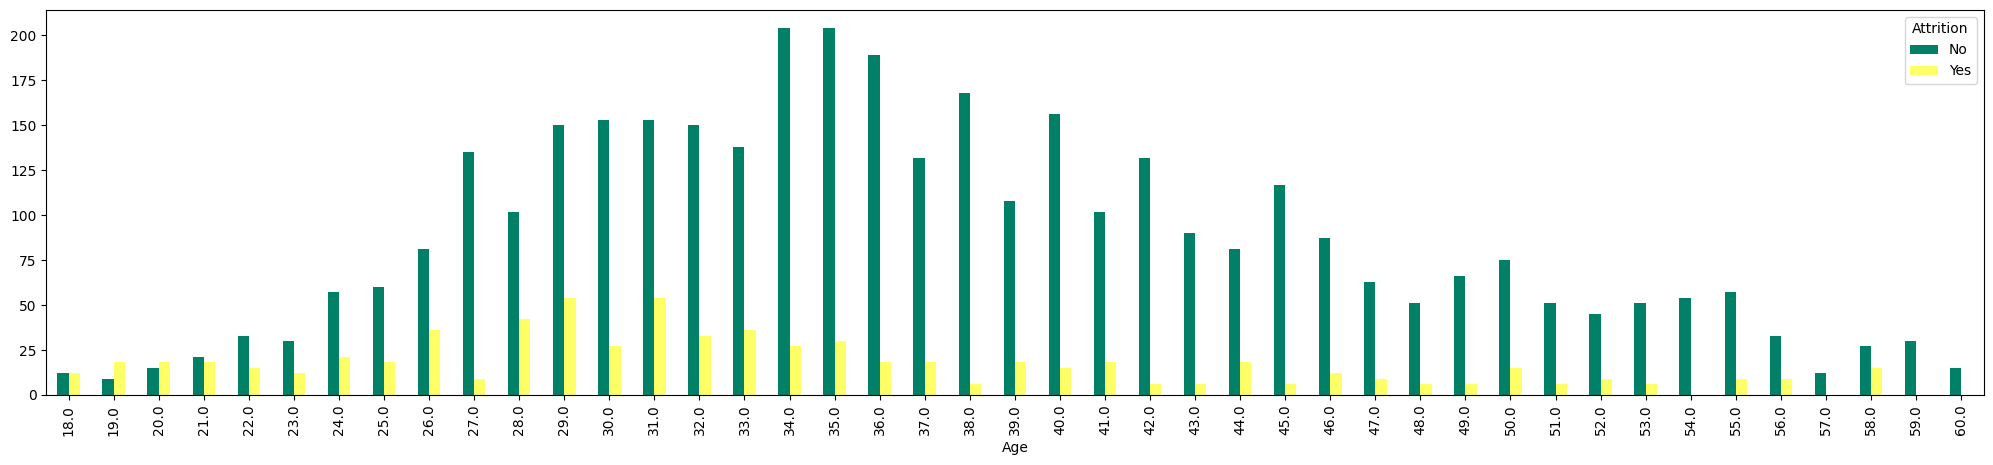

In [4]:
# Personas de que edad se retiran mas
pd.crosstab(index=df_completa['Age'],
            columns=df_completa["Attrition"]).plot(kind='bar', figsize=(25,5),colormap='summer')
#Los colaboradores que mas se retiran estan entre los 29 y los 31 años


<AxesSubplot:xlabel='Gender'>

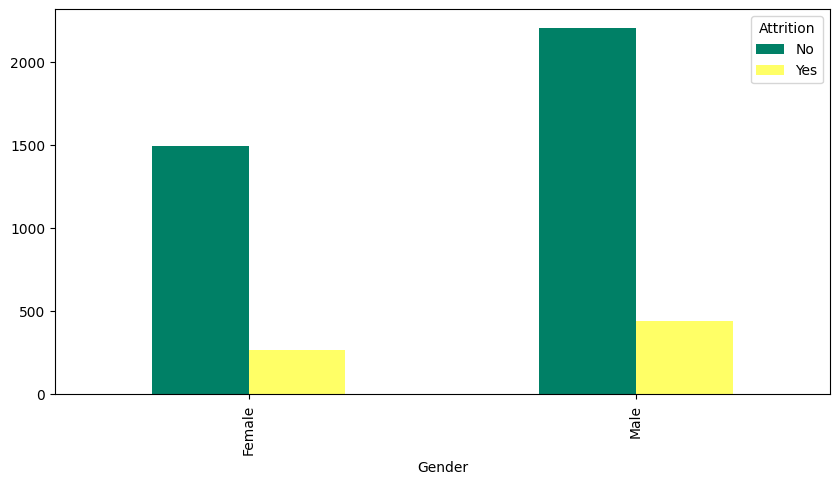

In [5]:
# Que genero es el que se esta retirando mas y el de los colaboradores
pd.crosstab(index=df_completa['Gender'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(10,5),colormap='summer')
#Los hombres son el genero que mas se ha retirado

<AxesSubplot:ylabel='JobRole'>

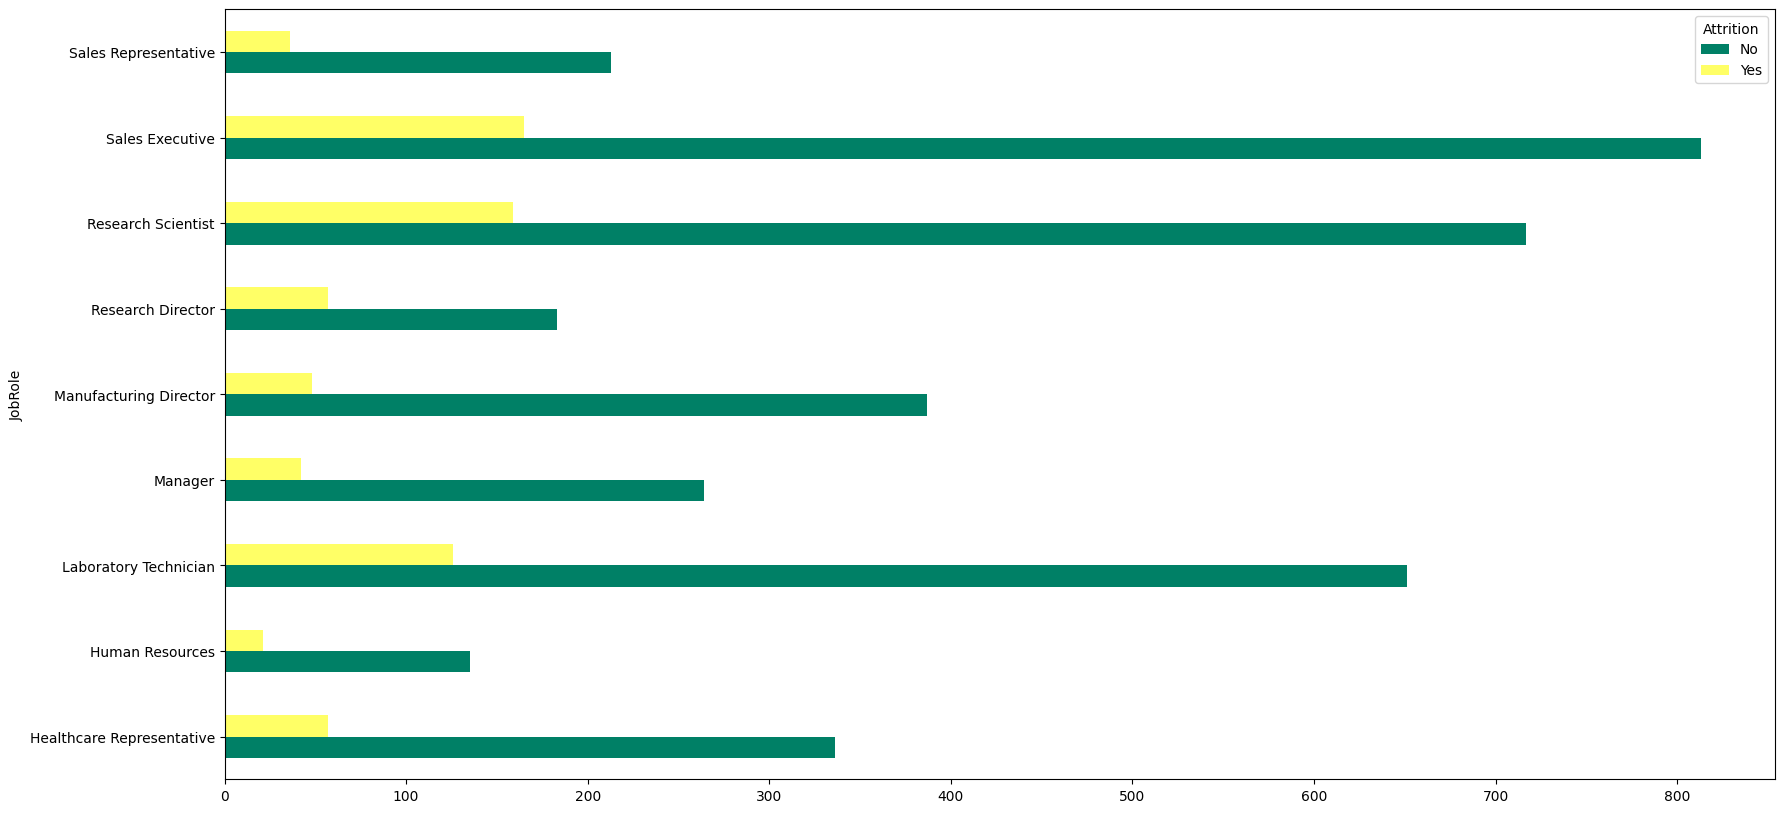

In [6]:
# Rol en la empresa de los colaboradoresy retirados
pd.crosstab(index=df_completa['JobRole'],
            columns=df_completa['Attrition']).plot(kind='barh', figsize=(20,10), colormap='summer')
#El rol que mas se retira es de sales executive y Research scientist

<AxesSubplot:ylabel='EducationField'>

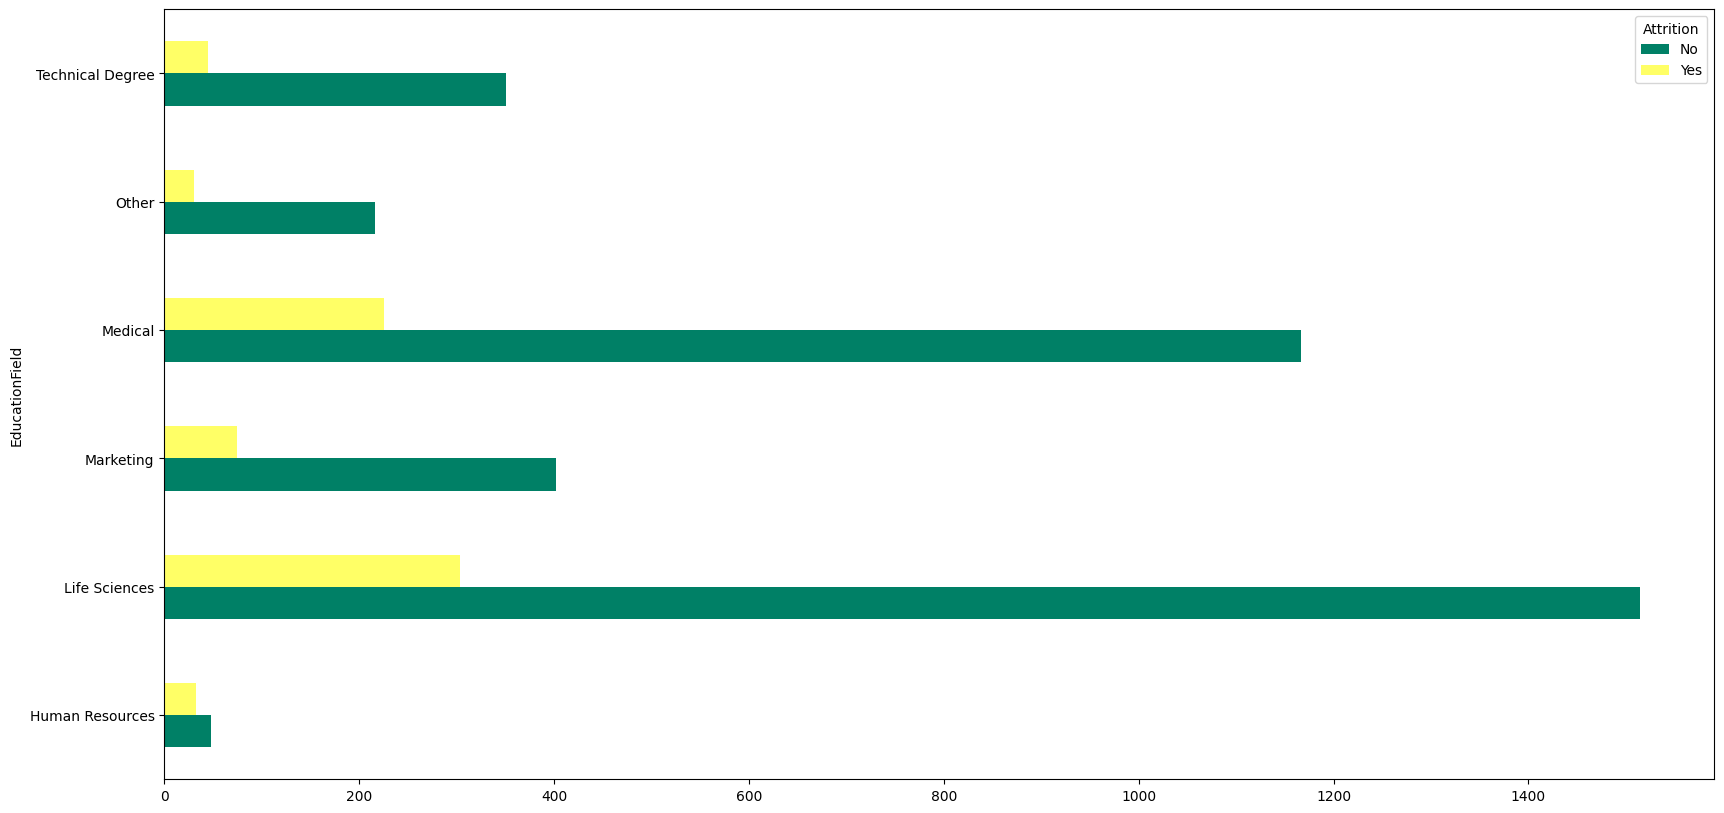

In [7]:
# Profesion de los colaboradores y retirados
pd.crosstab(index=df_completa['EducationField'],
            columns=df_completa['Attrition']).plot(kind='barh', figsize=(20,10), colormap='summer')
#La profesion que mas se retira en "la empresa" es life science

<AxesSubplot:xlabel='EnvironmentSatisfaction'>

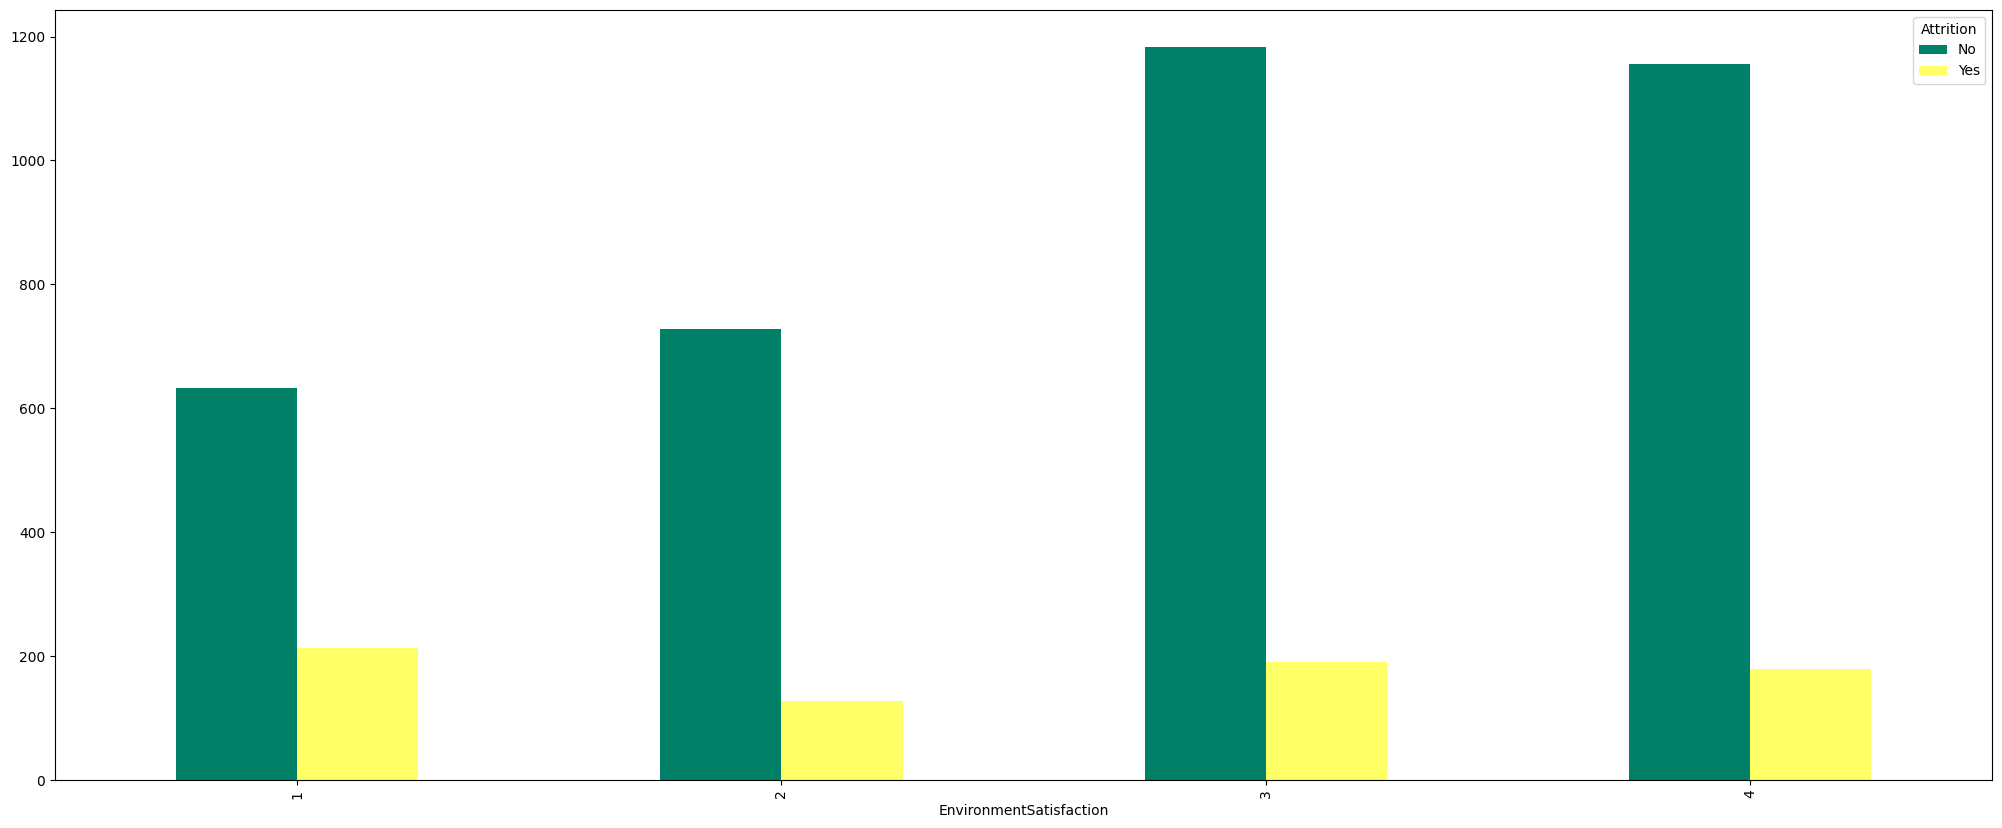

In [8]:
#Satisfacción de los colaboradores y retirados con el ambiente de trabajo
pd.crosstab(index=df_completa['EnvironmentSatisfaction'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(25,10), colormap='summer')
#Los colaboradores que mas se han retirado son los que califican como baja su satisfaccion con el ambiente laboral

<AxesSubplot:xlabel='WorkLifeBalance'>

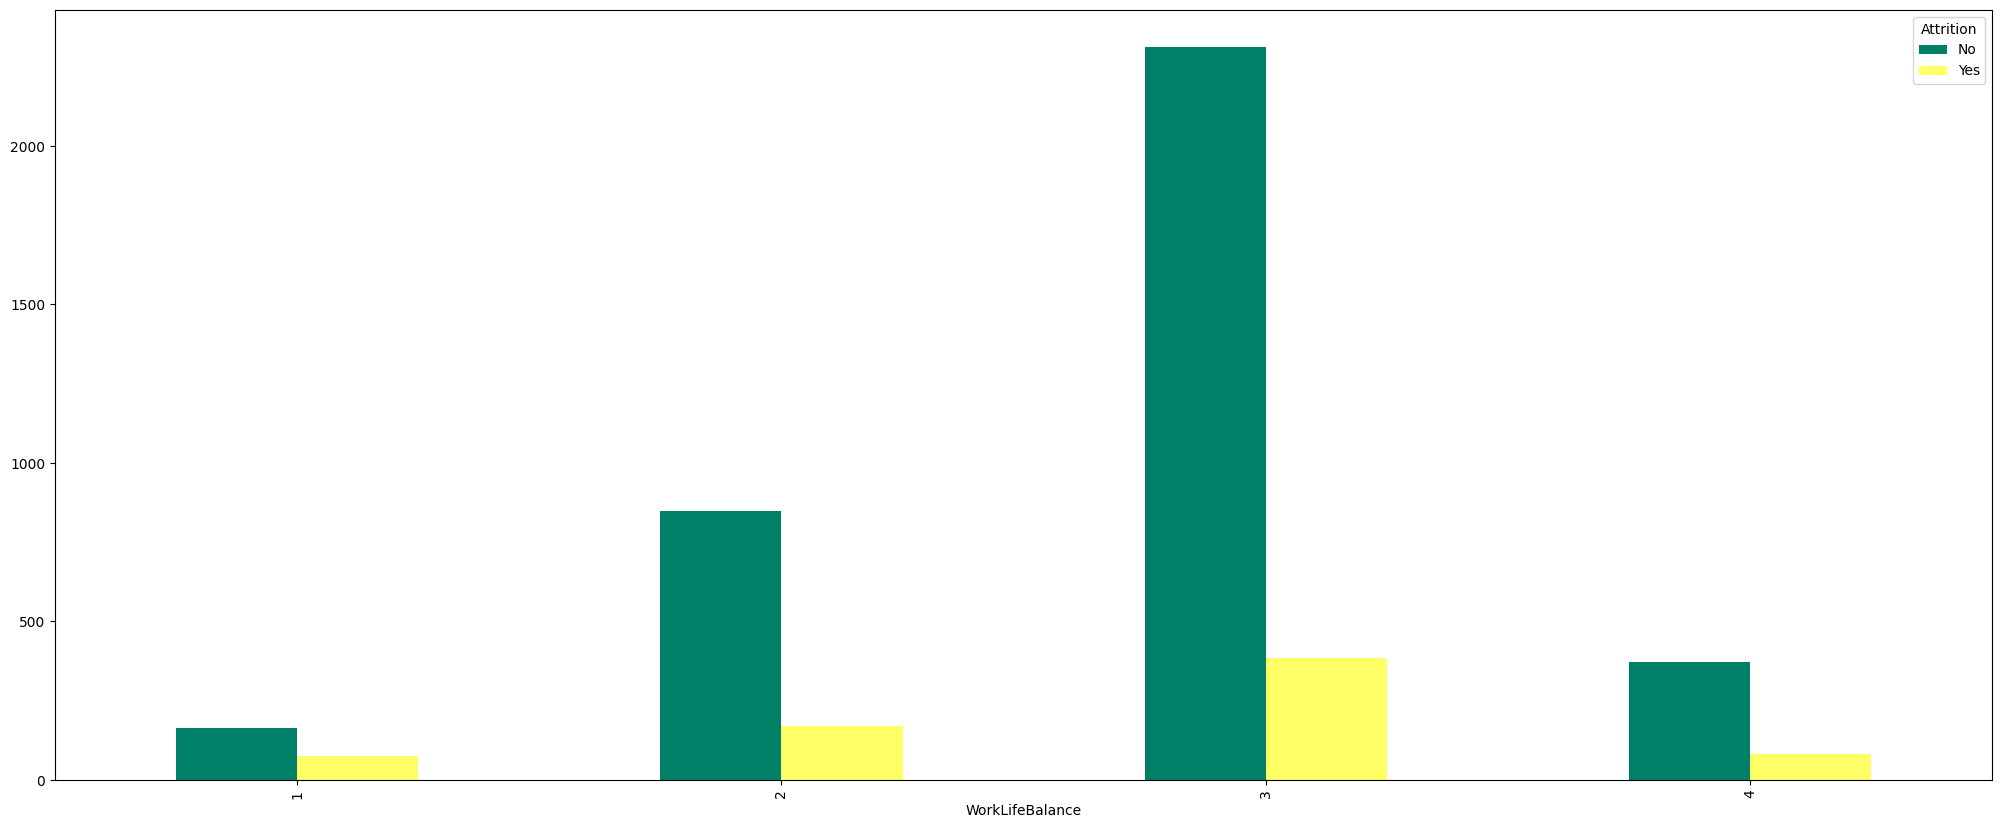

In [9]:
#Balance de vida de colaboradores y retirados
pd.crosstab(index=df_completa['WorkLifeBalance'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(25,10), colormap='summer')
#Los empleados que dicen tener un balance entre su vida laboral y el trabajo entre bueno y excelente son los que mas desercicion han tenido

<AxesSubplot:xlabel='BusinessTravel'>

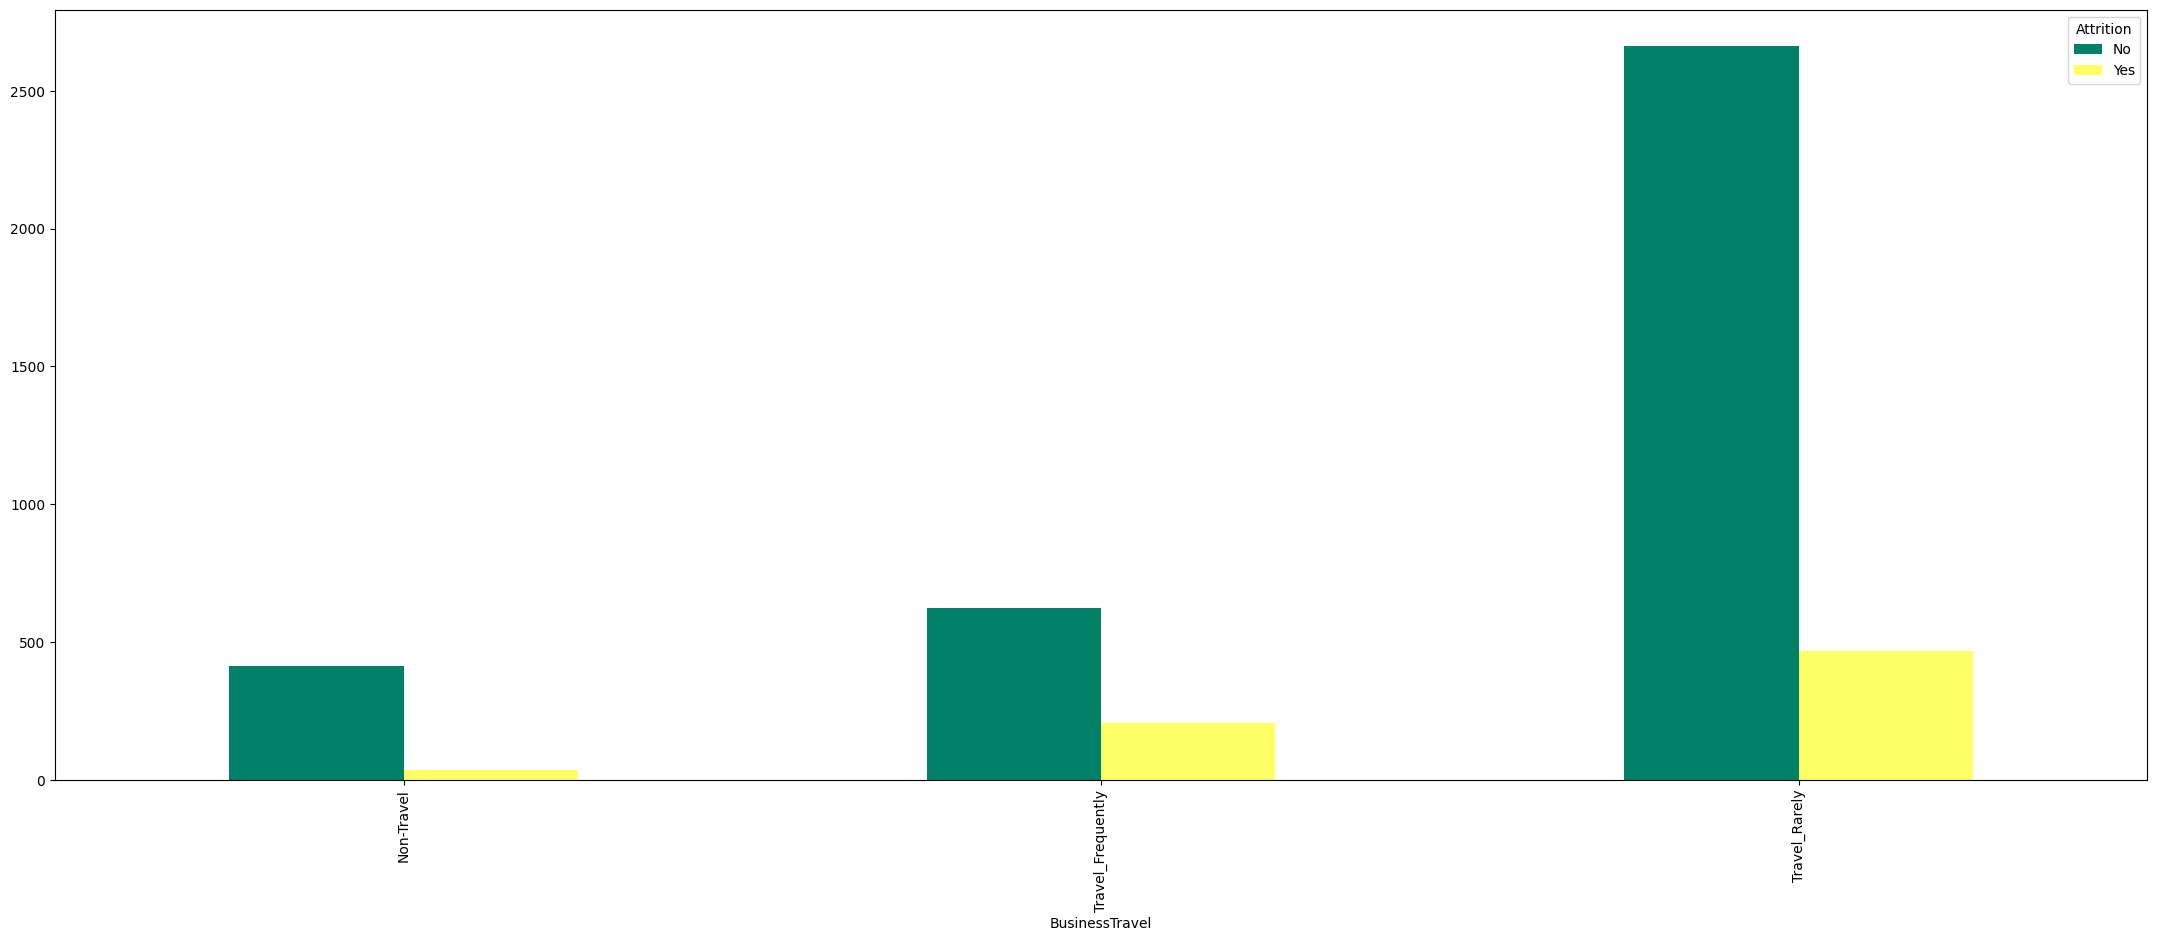

In [10]:
#Los colaboradores y retirados y sus viajes por negocios
pd.crosstab(index=df_completa['BusinessTravel'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(27,10), colormap='summer')
#Los colaboradores tanto los activos como los que renunciaron rara vez viajan, y la población de los que rara vez viajan son los que tienen mayores retiros

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

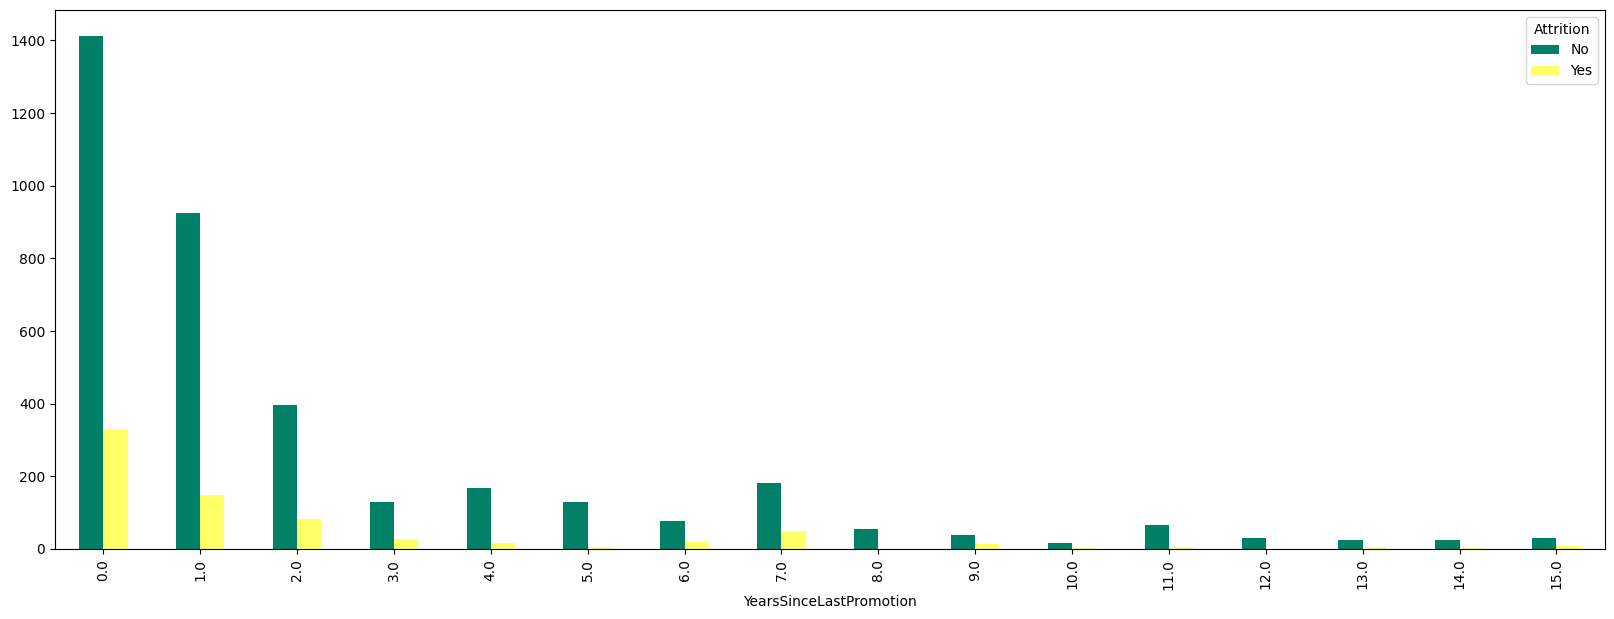

In [11]:
# Años que han pasado desde la ultima promoción en general
pd.crosstab(index=df_completa['YearsSinceLastPromotion'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
#Los que mas retiran son los que nuncca han tenido una promocion seguido de los que promovieron hace un año.

<AxesSubplot:xlabel='YearsWithCurrManager'>

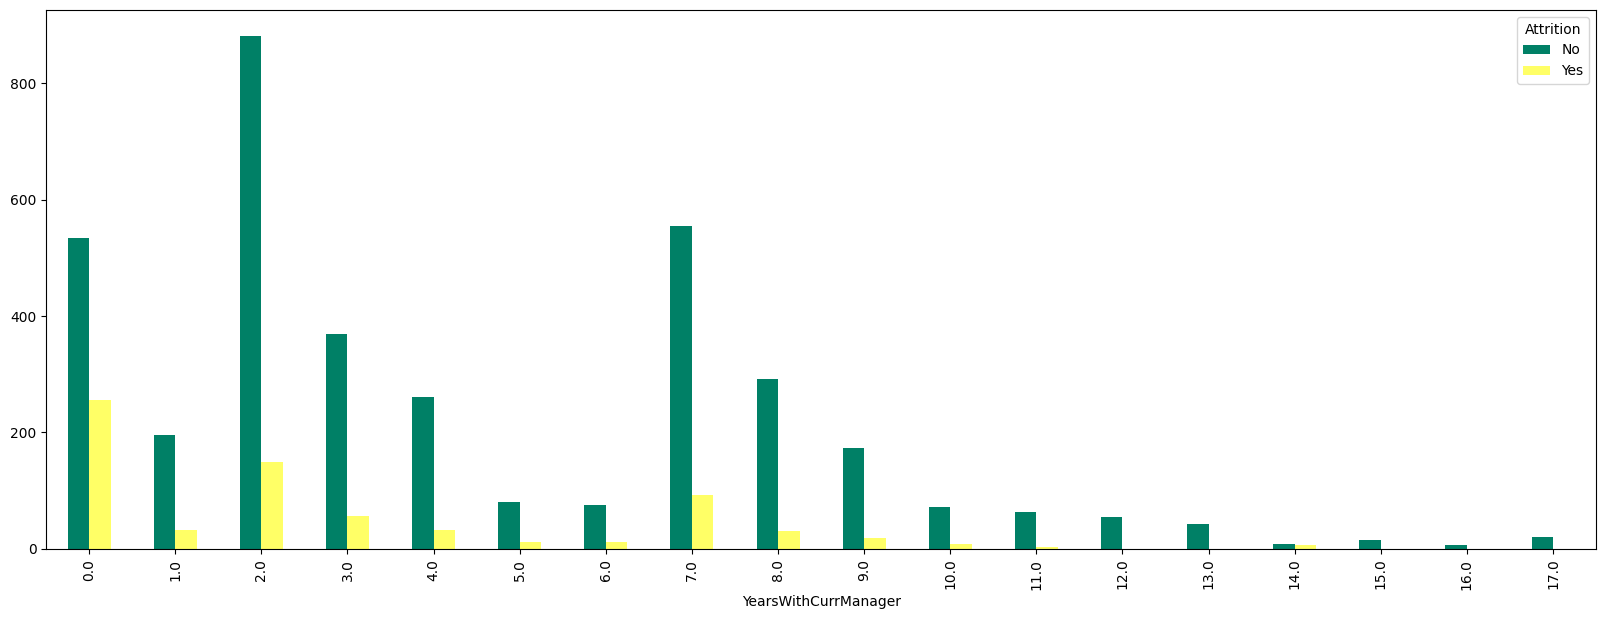

In [12]:
# Años bajo el mando del gerente actual en general
pd.crosstab(index=df_completa['YearsWithCurrManager'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
# La mayoria de los que se retiran no han pasado ni un año con el gerente actual, seguido de los que llevanban 2 años bajo su mando y luego los que llevaban 7 años bajo su mando.


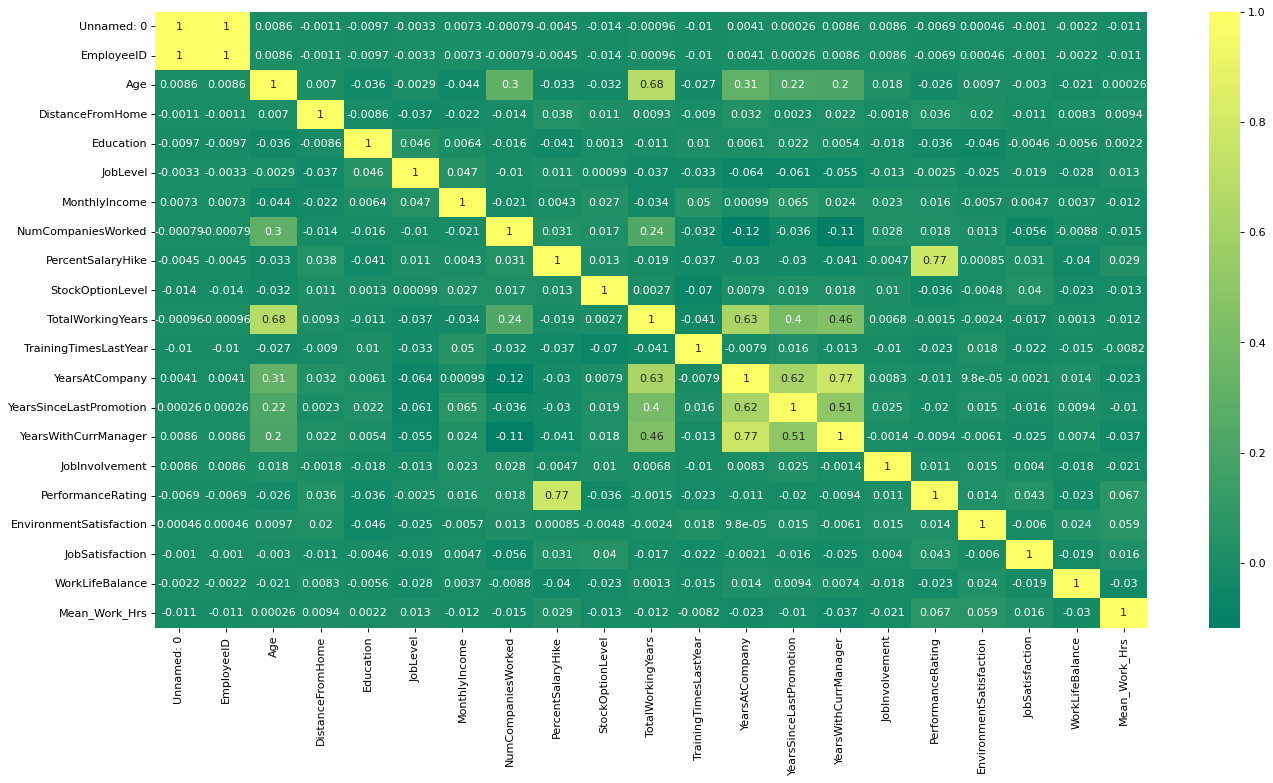

In [13]:

#Grafico de correlación

figure(figsize=(20, 10), dpi=80);
sns.heatmap(df_completa.corr(), annot = True,cmap='summer');
#Hay correlación fuerte positiva en las variables percentSalaryHike, PerformanceRating, YearsAtCompany,

<AxesSubplot:xlabel='TotalWorkingYears'>

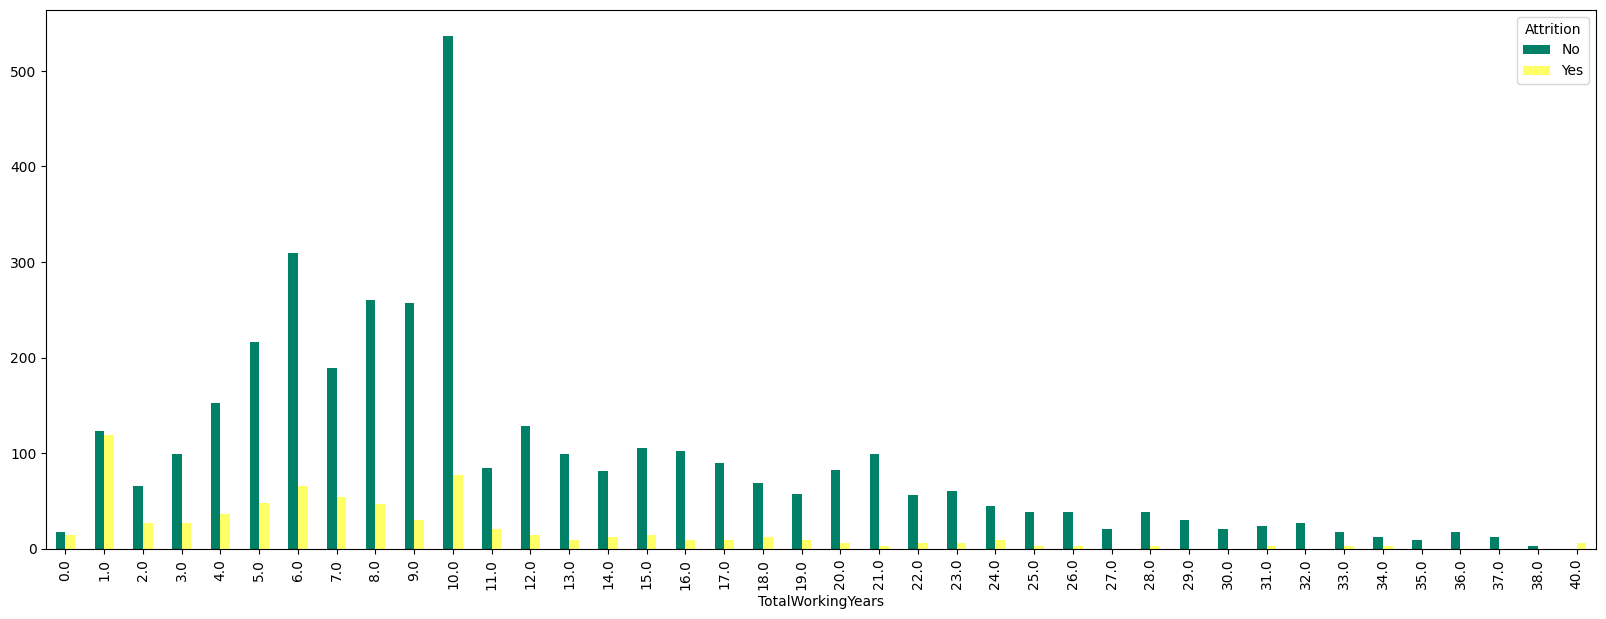

In [16]:
#Retiros segun los Años Trabajados
pd.crosstab(index=df_completa['TotalWorkingYears'],
            columns=df_completa['Attrition']).plot(kind='bar', figsize=(20,7), colormap='summer')
#Los empelados que mas renuncian son los que llevan un año trabajado

In [30]:
#Promedio de horas trabajdas de empleados que renuncian o no.
df_completa.groupby(["Attrition"])[["Mean_Work_Hrs"]].mean().round(2).reset_index()
#Los empleados que renuncian trabajan en promedio casi una hora mas diaria que los que no lo hacen.

,Attrition,Mean_Work_Hrs
0,No,7.58
1,Yes,8.32


In [52]:
#Promedio de salario mensual de empelados que renuncian o no
df_completa.groupby(["Attrition"])[["MonthlyIncome"]].mean().round(2).reset_index().rename(columns={'MonthlyIncome':'Salario Promedio'})
#el salario promedio de las personas que renuncian es menor que las que no por casi 4000 rupias

,Attrition,Salario Promedio
0,No,65672.60
1,Yes,61682.62


In [49]:
#Renuncias por grupo salarial
df2=df_completa.copy()
df2["Rango_Salario"]=pd.cut(df_completa["MonthlyIncome"],bins=3)
df2.groupby(["Rango_Salario","Attrition"])[["EmployeeID"]].count().rename(columns={'EmployeeID':'Empleados'})
#Las perosnas uqe mas renuncian se encuentran en el grupo salarial mas bajo.

Empleados
Rango_Salario        Attrition           
(9900.1, 73390.0]    No              2607
                     Yes              537
(73390.0, 136690.0]  No               699
                     Yes              102
(136690.0, 199990.0] No               393
                     Yes               72